In [2]:
import geopandas as gpd

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import glob

In [4]:
satskred_list = glob.glob("./data/satskred/AvalDet*.shp")
wyssen_list = glob.glob("./data/wyssen/SHP/join/wyssen*_join.shp")

In [5]:
# Satskred
satskred_1617_aut_file = gpd.read_file("./data/satskred/AvalDet_1617_aut.shp")
satskred_1718_aut_file = gpd.read_file("./data/satskred/AvalDet_1718_aut.shp")
satskred_1819_aut_file = gpd.read_file("./data/satskred/AvalDet_1819_aut.shp")

satskred_1617_man_file = gpd.read_file("./data/satskred/AvalDet_1617_man.shp")
satskred_1718_man_file = gpd.read_file("./data/satskred/AvalDet_1718_man.shp")
satskred_1819_man_file = gpd.read_file("./data/satskred/AvalDet_1819_man.shp")

# Wyssen
wyssen_1617_file = gpd.read_file("./data/wyssen/SHP/join/wyssen1617_join.shp")
wyssen_1718_file = gpd.read_file("./data/wyssen/SHP/join/wyssen1718_join.shp")
wyssen_1819_file = gpd.read_file("./data/wyssen/SHP/join/wyssen1819_join.shp")

In [6]:
# Satskred
satskred_1617_aut = gpd.GeoDataFrame(satskred_1617_aut_file)
satskred_1718_aut = gpd.GeoDataFrame(satskred_1718_aut_file)
satskred_1819_aut = gpd.GeoDataFrame(satskred_1819_aut_file)

satskred_1617_man = gpd.GeoDataFrame(satskred_1617_man_file)
satskred_1718_man = gpd.GeoDataFrame(satskred_1718_man_file)
satskred_1819_man = gpd.GeoDataFrame(satskred_1819_man_file)

# Wyssen
wyssen_1617 = gpd.GeoDataFrame(wyssen_1617_file)
wyssen_1718 = gpd.GeoDataFrame(wyssen_1718_file)
wyssen_1819 = gpd.GeoDataFrame(wyssen_1819_file)

In [7]:
satskred_aut_frames = [satskred_1617_aut,satskred_1718_aut,satskred_1819_aut]
satskred_aut_df = pd.concat(satskred_aut_frames, ignore_index=True)

In [8]:
satskred_man_frames = [satskred_1617_man,satskred_1718_man,satskred_1819_man]
satskred_man_df = pd.concat(satskred_man_frames)
satskred_man_df["Det_Date"] = satskred_man_df["Date"]
satskred_man_df["Ref_Date"] = satskred_man_df["Date"]

In [9]:
satskred_frames = [satskred_man_df, satskred_aut_df]
# satskred_df = pd.concat(satskred_frames)
satskred_df = satskred_aut_df

In [10]:
wyssen_frames = [wyssen_1617,wyssen_1718,wyssen_1819]
wyssen_df = pd.concat(wyssen_frames, join='outer', ignore_index=True)
wyssen_df["d"] = pd.to_datetime(wyssen_df["avalancher"])

In [11]:
import datetime
import numpy as np

# Add date cols
satskred_df["Ref_Date"] = pd.to_datetime(satskred_df["t_0"])
satskred_df["Det_Date"] = pd.to_datetime(satskred_df["t_1"])

In [12]:
wyssen_df.head()

,Name,SymbolID,event_mapp,date,local_obse,avalancher,avalanch_1,path_nr,path,elevation_,...,terminus_e,weak_layer,avalanche1,pic_name_s,observer_n,regobs,Shape_Leng,Shape_Area,geometry,d
0,TYIN_torv5_obs_20161202,0,TYIN_obs_20161202_6,2016-12-02,11:00:00,2016-12-02,11:00:00,5,torv5,1190,...,None,Poor within slab,Yes,No,SL,http://www.regobs.no/Registration/104712,0.002866,3.829140e-07,POLYGON Z ((8.229695371943933 61.2182898893669...,2016-12-02
1,TYIN_mel2_obs_20161202,0,TYIN_obs_20161202_2,2016-12-02,10:40:00,2016-12-02,10:40:00,13,mel2,1310,...,None,Loose snow,Yes,No,LS,http://www.regobs.no/Registration/104713,0.003863,6.049170e-07,POLYGON Z ((8.19351385997669 61.2598734283161 ...,2016-12-02
2,TYIN_stol1_obs_20161202,0,TYIN_obs_20161202_3,2016-12-02,11:10:00,2016-12-02,11:10:00,10,stol1,1235,...,None,Loose snow,Yes,No,LS,http://www.regobs.no/Registration/104714,0.003259,3.929210e-07,POLYGON Z ((8.199626012330668 61.2485258438926...,2016-12-02
3,TYIN_varden_obs_20161202,0,TYIN_obs_20161202_1,2016-12-02,10:30:00,2016-12-02,10:30:00,14,varden,1120,...,on the road,Poor within slab,Yes,Yes,LS,http://www.regobs.no/Registration/104710,0.003501,8.464390e-07,POLYGON Z ((8.202467801647799 61.2705593788123...,2016-12-02
4,TYIN_torv4_obs_20161202,0,TYIN_obs_20161202_5,2016-12-02,11:10:00,2016-12-02,11:10:00,4,torv4,1210,...,None,Poor within slab,Yes,No,LS,http://www.regobs.no/Registration/104711,0.006411,9.011830e-07,POLYGON Z ((8.228929506591498 61.2167069053994...,2016-12-02


In [13]:
satskred_df.head()

,area,aspect,det_count,east,length,north,raster_val,refdate,sat_geom,source,...,vv0_median,vv0_min,vv0_max,vh0_mean,vh0_median,vh0_min,vh0_max,geometry,Ref_Date,Det_Date
0,3690.926876,None,1,8.195374,434.031728,61.260144,16.0,2016-12-07 00:00:00,117,AvalDet_20161231_170935_ref_20161207_trno_117_...,...,-23.054697,-25.984091,-20.079021,-30.594744,-30.458412,-34.966465,-27.081316,"POLYGON ((8.195177439133777 61.25987516789603,...",2016-12-07,2016-12-31 17:09:35
1,21247.808245,None,1,8.198065,973.074430,61.259490,15.0,2016-12-07 00:00:00,117,AvalDet_20161231_170935_ref_20161207_trno_117_...,...,-21.699184,-26.825785,-15.982099,-28.841135,-28.720428,-33.217281,-24.667627,"POLYGON ((8.197893531082906 61.2585701014953, ...",2016-12-07,2016-12-31 17:09:35
2,5386.821031,None,1,8.213720,630.037545,61.235180,12.0,2016-12-26 00:00:00,44,AvalDet_20170101_170215_ref_20161226_trno_044_...,...,-19.695488,-23.344965,-14.922070,-24.228239,-24.471161,-28.440144,-20.455158,"POLYGON ((8.21295713335868 61.23481617912952, ...",2016-12-26,2017-01-01 17:02:15
3,22843.884004,None,1,8.197918,1055.520485,61.259463,13.0,2016-12-26 00:00:00,44,AvalDet_20170101_170215_ref_20161226_trno_044_...,...,-17.618906,-25.499401,-12.106519,-23.645086,-23.603981,-28.753635,-19.563250,"POLYGON ((8.197893531082906 61.2585701014953, ...",2016-12-26,2017-01-01 17:02:15
4,1795.606407,None,1,8.213564,258.482064,61.235182,19.0,2016-12-31 00:00:00,117,AvalDet_20170112_170933_ref_20161231_trno_117_...,...,-22.751648,-25.992640,-19.640621,-29.944088,-30.305767,-33.399609,-26.289957,"POLYGON ((8.213307762113439 61.23492392616465,...",2016-12-31,2017-01-12 17:09:33


In [14]:
satskred_df.columns

Index(['area', 'aspect', 'det_count', 'east', 'length', 'north', 'raster_val',
       'refdate', 'sat_geom', 'source', 't_0', 't_1', 'time', 'track_id',
       'uuid', 'width', 'dem_mean', 'dem_median', 'dem_min', 'dem_max',
       'slp_mean', 'slp_median', 'slp_min', 'slp_max', 'vv1_mean',
       'vv1_median', 'vv1_min', 'vv1_max', 'vh1_mean', 'vh1_median', 'vh1_min',
       'vh1_max', 'vv0_mean', 'vv0_median', 'vv0_min', 'vv0_max', 'vh0_mean',
       'vh0_median', 'vh0_min', 'vh0_max', 'geometry', 'Ref_Date', 'Det_Date'],
      dtype='object')

In [15]:
wyssen_df.columns

Index(['Name', 'SymbolID', 'event_mapp', 'date', 'local_obse', 'avalancher',
       'avalanch_1', 'path_nr', 'path', 'elevation_', 'elevation1',
       'avalanche_', 'moisture_d', 'trigger', 'size', 'fracture_w',
       'fracture_d', 'deposition', 'depositi_1', 'uncertaint', 'terminus_e',
       'weak_layer', 'avalanche1', 'pic_name_s', 'observer_n', 'regobs',
       'Shape_Leng', 'Shape_Area', 'geometry', 'd'],
      dtype='object')

In [16]:
wyssen_df.d[:].head()

0   2016-12-02
1   2016-12-02
2   2016-12-02
3   2016-12-02
4   2016-12-02
Name: d, dtype: datetime64[ns]

In [17]:
wyssen_gdf = gpd.GeoDataFrame(wyssen_df)

In [18]:
satskred_gdf = gpd.GeoDataFrame(satskred_df)

In [19]:
wyssen_gdf['satskred_match'] = "No match"
wyssen_gdf['satskred_indicies'] = list

In [20]:
wyssen_to_satskred = {}

for w_row in wyssen_gdf.itertuples():
    satskred_rows = satskred_gdf[(satskred_gdf["Ref_Date"] <= w_row.d) & (w_row.d <= satskred_gdf["Det_Date"])]
    if len(satskred_rows) == 0:
        wyssen_to_satskred[w_row.Index] = "No match"
    else:
        wyssen_to_satskred[w_row.Index] = satskred_rows.index
        #loop over overlap

In [21]:
wyssen_to_satskred

{0: 'No match',
 1: 'No match',
 2: 'No match',
 3: 'No match',
 4: 'No match',
 5: 'No match',
 6: Int64Index([4], dtype='int64'),
 7: Int64Index([4], dtype='int64'),
 8: Int64Index([4], dtype='int64'),
 9: Int64Index([4], dtype='int64'),
 10: Int64Index([4], dtype='int64'),
 11: Int64Index([4], dtype='int64'),
 12: Int64Index([4], dtype='int64'),
 13: Int64Index([4], dtype='int64'),
 14: Int64Index([4], dtype='int64'),
 15: Int64Index([4], dtype='int64'),
 16: Int64Index([4], dtype='int64'),
 17: Int64Index([4], dtype='int64'),
 18: 'No match',
 19: 'No match',
 20: 'No match',
 21: 'No match',
 22: 'No match',
 23: 'No match',
 24: 'No match',
 25: 'No match',
 26: 'No match',
 27: 'No match',
 28: 'No match',
 29: 'No match',
 30: 'No match',
 31: 'No match',
 32: 'No match',
 33: 'No match',
 34: 'No match',
 35: 'No match',
 36: 'No match',
 37: 'No match',
 38: 'No match',
 39: 'No match',
 40: 'No match',
 41: 'No match',
 42: 'No match',
 43: 'No match',
 44: 'No match',
 45: 

In [22]:
#for row in wyssen_gdf.itertuples():
    #overlap = gpd.overlay(wyssen_gdf,satskred_gdf,how='intersection')

In [23]:
print(satskred_gdf['geometry'])

0     POLYGON ((8.195177439133777 61.25987516789603,...
1     POLYGON ((8.197893531082906 61.2585701014953, ...
2     POLYGON ((8.21295713335868 61.23481617912952, ...
3     POLYGON ((8.197893531082906 61.2585701014953, ...
4     POLYGON ((8.213307762113439 61.23492392616465,...
5     POLYGON ((8.198059269205311 61.25866856794975,...
6     POLYGON ((8.19804943237884 61.26560719895456, ...
7     POLYGON ((8.208391998211694 61.24035406196727,...
8     POLYGON ((8.200112182562304 61.25696958649805,...
9     POLYGON ((8.199859625605329 61.26416633560624,...
10    POLYGON ((8.215284490411497 61.23529365175204,...
11    POLYGON ((8.21459791714717 61.2376021737839, 8...
12    POLYGON ((8.201535424300673 61.25127368475768,...
13    POLYGON ((8.198429462512303 61.25868721317511,...
14    POLYGON ((8.1968007398692 61.26446288511351, 8...
15    POLYGON ((8.197534200990948 61.25936306898571,...
16    POLYGON ((8.196570622905508 61.2672449733822, ...
17    POLYGON ((8.194058233176122 61.26847018736

In [24]:
from shapely.geometry import Polygon

In [42]:
satskred_gdf.intersects(wyssen_df)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
339    False
340    False
341    False
342    False
343    False
344    False
345    False
346    False
347    False
348    False
349    False
350    False
351    False
352    False
353    False
354    False
355    False
356    False
357    False
358    False
359    False
360    False
361    False
362    False
363    False
364    False
365    False
366    False
367    False
368    False
Length: 369, dtype: bool

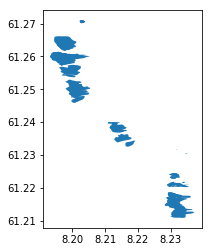

In [26]:
wyssen_gdf.plot()

In [48]:
dt_start = datetime.datetime.strptime("2018-01-01", "%Y-%M-%d")
dt_stop = datetime.datetime.strptime("2018-01-31", "%Y-%M-%d")
print(dt_start, dt_stop)

sat1 = satskred_df[satskred_df[(satskred_df["Ref_Date"] <= dt_start) & (dt_stop <= satskred_df["Det_Date"])]]
sat1.head()

2018-01-01 00:01:00 2018-01-31 00:01:00


,area,aspect,det_count,east,length,north,raster_val,refdate,sat_geom,source,...,vv0_median,vv0_min,vv0_max,vh0_mean,vh0_median,vh0_min,vh0_max,geometry,Ref_Date,Det_Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [ ]:
res_intersect = gpd.overlay(sat1, wyssen_gdf, how='intersection')
# res_intersect = gpd.overlay(satskred_gdf, wyssen_gdf, how='intersection')
print(len(res_intersect))

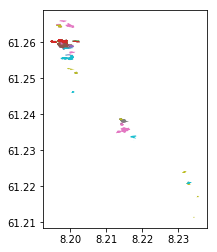

In [45]:
ax = res_intersect.plot(cmap='tab10')
# satskred_gdf.plot(ax=ax, facecolor='none', edgecolor='g')
# wyssen_gdf.plot(ax=ax, facecolor='none', edgecolor='b')
plt.gcf().savefig('sat_wys_intersect.png', dpi=150)

495


In [28]:
from shapely.geometry import Polygon
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])


polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])


df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

res_union = gpd.overlay(df1, df2, how='intersection')

In [29]:
wyssen_to_satskred

{0: 'No match',
 1: 'No match',
 2: 'No match',
 3: 'No match',
 4: 'No match',
 5: 'No match',
 6: Int64Index([4], dtype='int64'),
 7: Int64Index([4], dtype='int64'),
 8: Int64Index([4], dtype='int64'),
 9: Int64Index([4], dtype='int64'),
 10: Int64Index([4], dtype='int64'),
 11: Int64Index([4], dtype='int64'),
 12: Int64Index([4], dtype='int64'),
 13: Int64Index([4], dtype='int64'),
 14: Int64Index([4], dtype='int64'),
 15: Int64Index([4], dtype='int64'),
 16: Int64Index([4], dtype='int64'),
 17: Int64Index([4], dtype='int64'),
 18: 'No match',
 19: 'No match',
 20: 'No match',
 21: 'No match',
 22: 'No match',
 23: 'No match',
 24: 'No match',
 25: 'No match',
 26: 'No match',
 27: 'No match',
 28: 'No match',
 29: 'No match',
 30: 'No match',
 31: 'No match',
 32: 'No match',
 33: 'No match',
 34: 'No match',
 35: 'No match',
 36: 'No match',
 37: 'No match',
 38: 'No match',
 39: 'No match',
 40: 'No match',
 41: 'No match',
 42: 'No match',
 43: 'No match',
 44: 'No match',
 45: 

In [30]:
expr = 'Ref_Date <= d & d => Det_Date'

In [31]:
map(lambda frame: frame.query(expr), [wyssen_df_1, satskred_df_1])

NameError: name 'wyssen_df_1' is not defined

In [ ]:
wyssen_df_1['d'].where(satskred_df_1)